# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [4]:
import pandas as pd
df = pd.read_csv('data/iowa.csv')
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


<Axes: xlabel='Profit', ylabel='Item Description'>

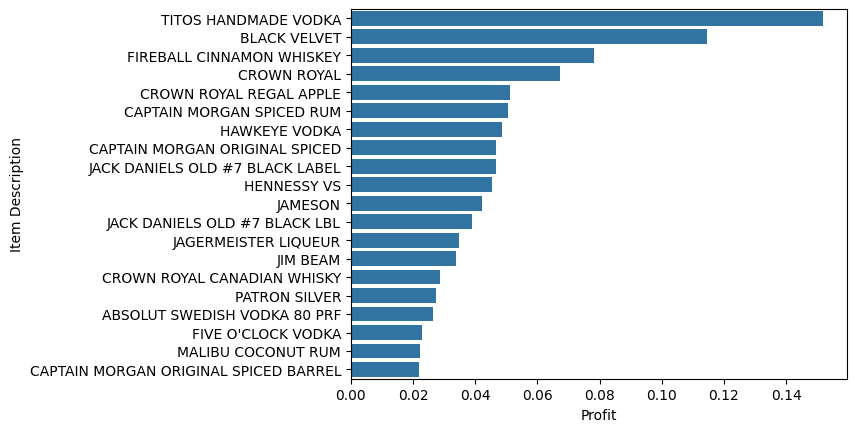

In [10]:
#the most profitable item would be the maximum row value when subtracting the state bottle cost from the state bottle retail and multiplying this by bottles sold
import seaborn as sns
profits = (
    df.loc[:, ['Profit', 'Item Description']]
      .groupby('Item Description')
      .sum()
      .sort_values(by='Profit', ascending=False)
)
top_profits = profits[:20]
sns.barplot(
    x=top_profits['Profit'] / np.sum(top_profits['Profit']),
    y=top_profits.index,
    orient='h'
)

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [11]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])
#x-y #since the arrays are different shapes, they can't be subtracted
x.reshape(-1, 1)-y.reshape(1, -1) #we get an answer this time, because x.reshape turns it into a column vector and y.reshape turns it into a row vector, which means we can subtract them.
reshape1 = []
for i in x:
    row = []
    for j in y:
        row.append(i - j)
    reshape1.append(row)
reshape2 = []
for j in y:
    row = []
    for i in x:
        row.append(i - j)
    reshape2.append(row)
#x.reshape(1, -1) turns x into a row vector (1 x 3), and x.reshape(-1, 1) turns x into a column vector (3 x 1)

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

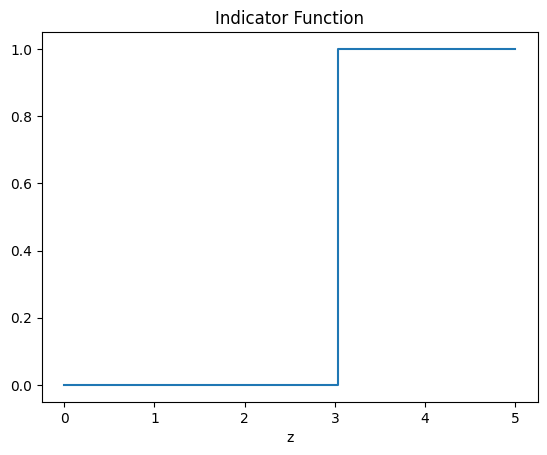

In [16]:
z = np.linspace(0, 5, 100)
x = 3
indicator = np.where(x <= z, 1, 0)
plt.step(z, indicator, where="post")
plt.xlabel('z')
plt.title('Indicator Function')
plt.show()

the reason $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ is because if we look at the definition, if x<=z, then I(x<=z) = 1, and if x>z, I(x>=z)=0. If we put this back up as the piecewise, we see that it's the exact same as I(x>z).

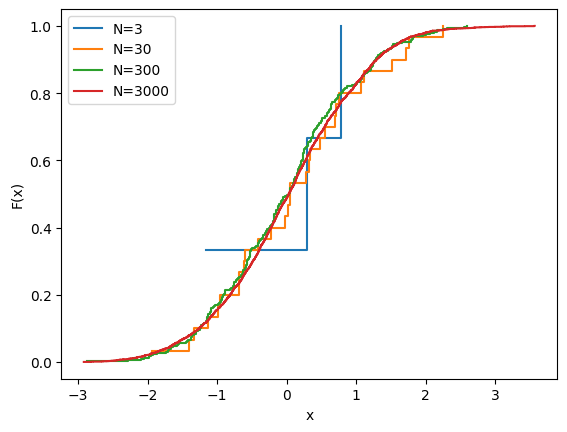

In [25]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def ecdf(x):
    Z = np.sort(np.unique(x))
    compare = x.reshape(-1,1) <= Z.reshape(1, -1)
    ecdf = np.mean(compare, axis=0)
    return ecdf, Z

for N in (3,30,300,3000):
    x = rng.normal(0,1,N)
    # ECDF plot goes here:
    F_hat, grid = ecdf(x)
    plt.step(grid, F_hat, where="post", label=f"N={N}")
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.legend() 

- as N increases, the ECDF becomes smoother by converging to the true distribution (which in our case is a normal CDF)

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [27]:
#quantile function
def quantile(x, q):
    sorted_x = np.sort(x)
    index = q*(len(sorted_x)-1)
    if index.is_integer():
        return sorted_x[int(index)]
    else:
        return sorted_x[int(np.floor(index))] + (index - np.floor(index)) * (sorted_x[int(np.ceil(index))] - sorted_x[int(np.floor(index))]) #linear interpolation

In [29]:
#IQR
def iqr(x):
    q25 = quantile(x, .25)
    q75 = quantile(x, .75)
    iq_range = q75 - q25
    lower_whisker = q25 - 1.5 * iq_range
    upper_whisker = q75 + 1.5 * iq_range
    return q25, q75, iq_range, lower_whisker, upper_whisker

In [35]:
#boxplot summary
def boxplot_summary(x):
    min_val = min(x)
    q25 = quantile(x, 0.25)
    median = quantile(x, 0.5)
    q75 = quantile(x, 0.75)
    max_val = max(x)
    iqr_result = iqr(x)
    lower_whisker = iqr_result[3]
    upper_whisker = iqr_result[4]
    print(f"Minimum: {min(x):.2f}")
    print(f"Lower Whisker: {lower_whisker:.2f}")
    print(f"Q25: {q25:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Q75: {q75:.2f}")
    print(f"Upper Whisker: {upper_whisker:.2f}")
    print(f"Maximum: {max_val:.2f}")

In [36]:
#finding outliers
def outliers(x):
    iqr_result = iqr(x)
    lower_whisker = iqr_result[1]
    upper_whisker = iqr_result[2]
    outliers = (x < lower_whisker) | (x > upper_whisker)
    return outliers

In [37]:
df["State Bottle Retail"].describe()

count    159904.000000
mean         16.480350
std          17.099067
min           0.000000
25%           8.670000
50%          12.990000
75%          19.920000
max        3448.260000
Name: State Bottle Retail, dtype: float64

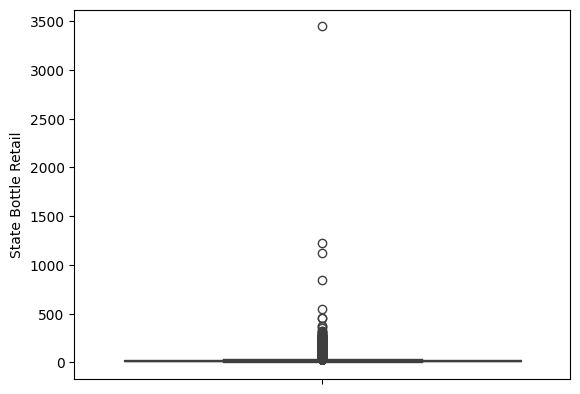

In [38]:
sns.boxplot(df["State Bottle Retail"])
plt.show()

In [39]:
boxplot_summary(df["State Bottle Retail"])

Minimum: 0.00
Lower Whisker: -8.21
Q25: 8.67
Median: 12.99
Q75: 19.92
Upper Whisker: 36.80
Maximum: 3448.26


5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?